In [11]:
st.markdown('Breast Cancer Stats')

2022-01-14 10:36:57.543 
  command:

    streamlit run /opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [4]:
import streamlit as st

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

pd.set_option("display.max_columns", 50)

2022-01-14 10:22:10.035 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [5]:
breast_cancer = datasets.load_breast_cancer(as_frame=True)

breast_cancer_df = pd.concat((breast_cancer["data"], breast_cancer["target"]), axis=1)

breast_cancer_df["target"] = [breast_cancer.target_names[val] for val in breast_cancer_df["target"]]

breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


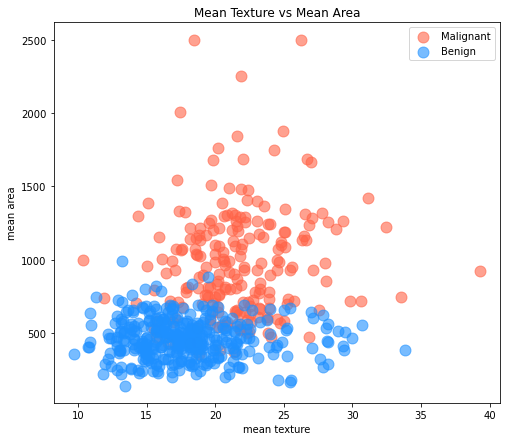

In [6]:
scatter_fig = plt.figure(figsize=(8,7))

scatter_ax = scatter_fig.add_subplot(111)

malignant_df = breast_cancer_df[breast_cancer_df["target"] == "malignant"]
benign_df = breast_cancer_df[breast_cancer_df["target"] == "benign"]

malignant_df.plot.scatter(x="mean texture", y="mean area", s=120, c="tomato", alpha=0.6, ax=scatter_ax, label="Malignant")
benign_df.plot.scatter(x="mean texture", y="mean area", s=120, c="dodgerblue", alpha=0.6, ax=scatter_ax,
                       title="Mean Texture vs Mean Area", label="Benign");

In [7]:
avg_breast_cancer_df = breast_cancer_df.groupby("target").mean()

avg_breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
benign,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
malignant,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


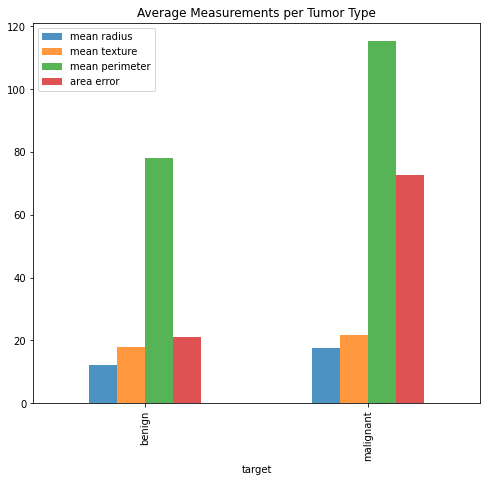

In [8]:
bar_fig = plt.figure(figsize=(8,7))

bar_ax = bar_fig.add_subplot(111)

sub_avg_breast_cancer_df = avg_breast_cancer_df[["mean radius", "mean texture", "mean perimeter", "area error"]]

sub_avg_breast_cancer_df.plot.bar(alpha=0.8, ax=bar_ax, title="Average Measurements per Tumor Type");

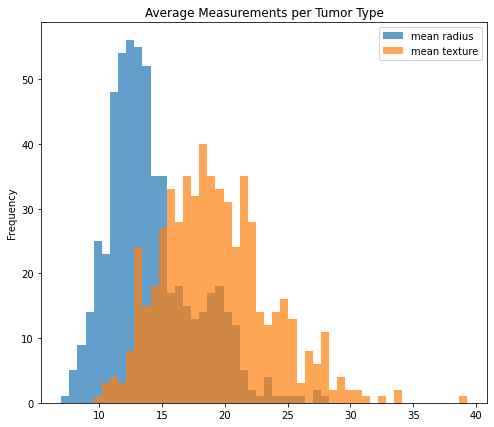

In [9]:
hist_fig = plt.figure(figsize=(8,7))

hist_ax = hist_fig.add_subplot(111)

sub_breast_cancer_df = breast_cancer_df[["mean radius", "mean texture"]]

sub_breast_cancer_df.plot.hist(bins=50, alpha=0.7, ax=hist_ax, title="Average Measurements per Tumor Type");

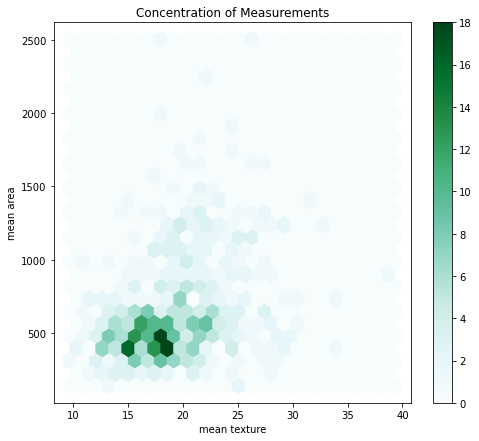

In [10]:
hexbin_fig = plt.figure(figsize=(8,7))

hexbin_ax = hexbin_fig.add_subplot(111)

breast_cancer_df.plot.hexbin(x="mean texture", y="mean area",
                             reduce_C_function=np.mean,
                             gridsize=25,
                             #cmap="Greens",
                             ax=hexbin_ax,
                             title="Concentration of Measurements"
                            );